In [ ]:
import json
import os
from PIL import Image, ImageDraw
from reportlab.pdfgen import canvas


def load_data(results_json_path:str, video_id:str):

	with open(results_json_path,'r') as file:
		new_data = json.load(file)
	pred = new_data[video_id]['pred']

	return pred

def render_results(video_id:str, 
				   results_json_path:str,
				   thumbnails_parent_dir:str,
				   thumbnails_resolution:tuple,
				   num_cols:int):
	
	# Parse argument
	thumbnails_dir = f'{thumbnails_parent_dir}/{video_id}'

	# Load thumbnails
	thumbnails_path = os.listdir(thumbnails_dir)
	thumbnails_path.sort()

	# Load prediction results
	pred = load_data(results_json_path, video_id)

	# Grid parameters
	top_margin = 40
	side_margin = 20
	vertical_spacing = 40
	horizontal_spacing = 20

	num_rows = len(thumbnails_path) // num_cols + 1
	image_width, image_height = thumbnails_resolution
	grid_width = side_margin + num_cols * (image_width + horizontal_spacing) 
	grid_height = top_margin + num_rows * (image_height + vertical_spacing)

	# Create a blank grid image
	grid_image = Image.new("RGB", (grid_width, grid_height), "white")
	draw = ImageDraw.Draw(grid_image)

	# Place images in the grid
	for idx, image_path in enumerate(thumbnails_path):
		img = Image.open(f"{thumbnails_dir}/{image_path}")
		img = img.resize(thumbnails_resolution)
		row = idx // num_cols
		col = idx % num_cols
		x = side_margin + col * (image_width + horizontal_spacing)
		y = top_margin + row * (image_height + vertical_spacing)
		
		# Highlight if interlude
		if pred[idx] == 1:
			rectangle_position = (x-horizontal_spacing//2, y-vertical_spacing//2, 
								x+image_width+horizontal_spacing//2, y+image_height+vertical_spacing//2)  
			draw.rectangle(rectangle_position, fill=(100, 0, 0))  # Red with 30% opacity		

		# Render thumbnail
		grid_image.paste(img, (x, y))

	# Save the grid as a temporary file
	temp_grid_path = "grid_image.jpg"
	grid_image.save(temp_grid_path)

	# Create a PDF with the grid image using reportlab
	pdf_path = "image_grid.pdf"
	c = canvas.Canvas(pdf_path)
	c.drawImage(temp_grid_path, 0, 0, width=grid_width, height=grid_height)
	c.showPage()
	c.save()

# Selector
video_id = "8LR91G0iNv4"
results_json_path = "sample.json"
thumbnails_parent_dir = f"../../data/thumbnails/thumbnails_60secsPerFrame_320px240px"
thumbnails_resolution = (160,120)
num_cols = 10

render_results(video_id, results_json_path, thumbnails_parent_dir, thumbnails_resolution, num_cols)

160 120


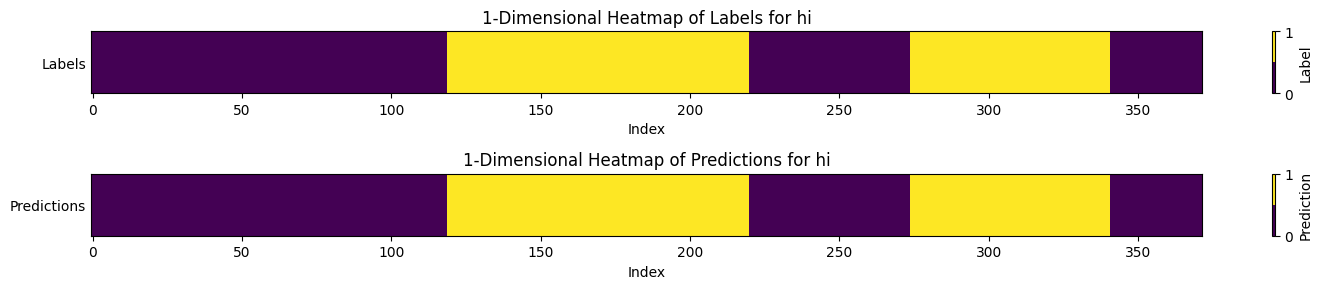

In [ ]:
import json
import matplotlib.pyplot as plt

key = ""

# Select data
with open('07nov_run6_iter32_train.json','r') as file:
    old_data = json.load(file)
labels = old_data['video_0000']['pred']

with open('sample.json','r') as file:
    new_data = json.load(file)
pred = new_data['4k7uwgFI9DA']['pred']

# Plot the 1-dimensional heatmap
plt.figure(figsize=(15, 3))
cmap = plt.get_cmap('viridis', 2)  # 2 discrete colors

# Plot the labels
plt.subplot(2, 1, 1)
plt.imshow([labels], aspect='auto', cmap=cmap, vmin=0, vmax=1)
plt.colorbar(label='Label', ticks=[0, 1])
plt.xlabel('Index')
plt.title(f'1-Dimensional Heatmap of Labels for {key}')
plt.gca().set_yticks([0])
plt.gca().set_yticklabels(['Labels'])
plt.gca().tick_params(axis='y', which='both', length=0)

# Plot the predictions
plt.subplot(2, 1, 2)
plt.imshow([pred], aspect='auto', cmap=cmap, vmin=0, vmax=1)
plt.colorbar(label='Prediction', ticks=[0, 1])
plt.xlabel('Index')
plt.title(f'1-Dimensional Heatmap of Predictions for {key}')
plt.gca().set_yticks([0])
plt.gca().set_yticklabels(['Predictions'])
plt.gca().tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()

